<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/K mean Clusturring.zip'

Archive:  /content/K mean Clusturring.zip
   creating: 2 Project-K-means clustering/2 Project/
   creating: 2 Project-K-means clustering/2 Project/K-means/
   creating: 2 Project-K-means clustering/2 Project/K-means/Dataset/
  inflating: 2 Project-K-means clustering/2 Project/K-means/Dataset/cust_data.xlsx  
   creating: 2 Project-K-means clustering/2 Project/K-means/Problem Statement/
  inflating: 2 Project-K-means clustering/2 Project/K-means/Problem Statement/Problem_Statement_Kmeans.pdf  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('/content/2 Project-K-means clustering/2 Project/K-means/Dataset/cust_data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df['Gender'] = np.where(df['Gender'].isna(),df['Gender'].mode(),df['Gender'])

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
df['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

Encode the Gender varaible


In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

In [ ]:
df.drop(['Cust_ID'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  30000 non-null  int64
 1   Orders                  30000 non-null  int64
 2   Jordan                  30000 non-null  int64
 3   Gatorade                30000 non-null  int64
 4   Samsung                 30000 non-null  int64
 5   Asus                    30000 non-null  int64
 6   Udis                    30000 non-null  int64
 7   Mondelez International  30000 non-null  int64
 8   Wrangler                30000 non-null  int64
 9   Vans                    30000 non-null  int64
 10  Fila                    30000 non-null  int64
 11  Brooks                  30000 non-null  int64
 12  H&M                     30000 non-null  int64
 13  Dairy Queen             30000 non-null  int64
 14  Fendi                   30000 non-null  int64
 15  Hewlett Packard    

In [ ]:
WCSS=[]
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit(df)
  WCSS.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Within the cluster sum of squares across multiple clusters')

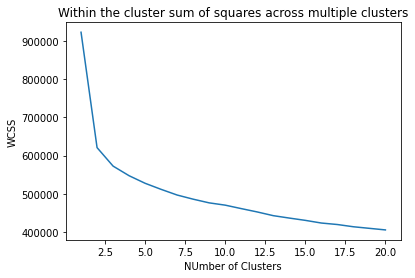

In [ ]:
plt.plot(range(1,21),WCSS)
plt.xlabel('NUmber of Clusters')
plt.ylabel('WCSS')
plt.title('Within the cluster sum of squares across multiple clusters')

K Means with 7 Clusters

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
df['Clusters'] = kmeans.labels_

In [ ]:
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Clusters
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


<Axes: >

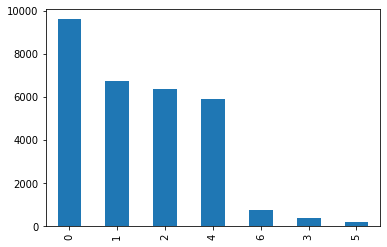

In [ ]:
df['Clusters'].value_counts().plot(kind = 'bar')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(silhouette_score(df.iloc[:,0:-1],labels=df['Clusters']))

0.13053359784647794


In [ ]:
df.groupby(['Clusters'])['Orders'].sum()

Clusters
0     2583
1    62715
2    18912
3     1769
4    35730
5      854
6     2531
Name: Orders, dtype: int64

In [ ]:
pd.crosstab(df['Clusters'],df['Gender'])

Gender,0,1
Clusters,,
0,8021,1590
1,5489,1242
2,5248,1138
3,293,88
4,4846,1068
5,176,46
6,705,50
